# Datasets

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
data.shape

(150, 4)

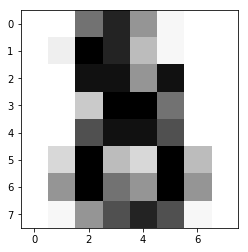

In [3]:
digits = datasets.load_digits()
import matplotlib.pyplot as plt
% matplotlib inline
plt.imshow(digits.images[-1],cmap = 'Greys')

# printing image in matplotlib.Missed this matplotlib documnetation.so,inserting it here.

# Supervised Learning

**KNeighborsClassifier**

let's take an example of iris dataset and also define iris_X and iris_y

In [4]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = iris.target

Let us try to define KNN(K Nearest Neighbors) classification which is easiest of all classifiers.

In [5]:
indices = np.random.permutation(len(iris_X))
# We are permutating because the data should be shuffled.
iris_X_train = iris_X[indices[:-20]]
iris_y_train = iris_y[indices[:-20]]
iris_X_test = iris_X[indices[-20:]]
iris_y_test = iris_y[indices[-20:]]

We defined what our test and train sets are now its time to define KNN Classifier.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train,iris_y_train)
#knn.predict(iris_X_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [7]:
knn.predict(iris_X_test)

array([0, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 0, 1, 0, 0, 0, 2, 0, 1, 1])

In [8]:
iris_y_test

array([0, 2, 0, 1, 2, 1, 0, 2, 1, 2, 2, 0, 1, 0, 0, 0, 2, 0, 1, 1])

** Linear regression **

In [9]:
# importing diabetes dataset
db = datasets.load_diabetes()
#db

In [10]:
len(db.target)

442

In [11]:
len(db.data)

442

In [12]:
db_X_train = db.data[:-20]
db_y_train = db.target[:-20]
db_y_test = db.target[-20:]
db_X_test = db.data[-20:]

In [13]:
from sklearn import linear_model as lm
rg = lm.LinearRegression()
rg.fit(db_X_train,db_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
pr=rg.predict(db_X_test)

In [15]:
pr

array([ 197.61846908,  155.43979328,  172.88665147,  111.53537279,
        164.80054784,  131.06954875,  259.12237761,  100.47935157,
        117.0601052 ,  124.30503555,  218.36632793,   61.19831284,
        132.25046751,  120.3332925 ,   52.54458691,  194.03798088,
        102.57139702,  123.56604987,  211.0346317 ,   52.60335674])

In [16]:
db_y_test

array([ 233.,   91.,  111.,  152.,  120.,   67.,  310.,   94.,  183.,
         66.,  173.,   72.,   49.,   64.,   48.,  178.,  104.,  132.,
        220.,   57.])

In [17]:
# Checking mean square error
np.mean((rg.predict(db_X_test)-db_y_test)**2)

2004.5676026898223

We have already learnt that best way to check the precision of a program.we need to check 'score'.

In [18]:
rg.score(db_X_test,db_y_test)

0.58507530226905713

Ridge regression is a type of shrinkage method akin to regularisation.

In ridge regression we can minimise the features but cannot set them to zero.Lasso regression is another type of shrinkage method in which we can set the values of features zero.
Lasso is mainly useful for large datasets.Scikit Learn also provides us with LassoLars method for using on small datasets

 **Logistic Regression**

In [19]:
from sklearn import linear_model as lm

In [20]:
log = lm.LogisticRegression()
iris = datasets.load_iris()
X_train = iris.data[:-30]
y_train = iris.target[:-30]
X_test = iris.data[-30:]
y_test = iris.target[-30:]

In [21]:
log.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
log.predict(X_test)

array([2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2,
       2, 2, 2, 1, 1, 2, 2])

In [23]:
y_test

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2])

F1 score is used to find the accuracy of a logistic regression.

In [24]:
from sklearn import metrics
a = metrics.f1_score(y_test,log.predict(X_test),average = 'micro')
b = metrics.f1_score(y_test,log.predict(X_test),average = 'macro')
c = metrics.f1_score(y_test,log.predict(X_test),average = 'weighted')
print(a,b,c)

0.433333333333 0.302325581395 0.604651162791


C:\Users\user\anaconda_new\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


- Micro calculates F1 score globally by calculated all Trur positive,False positives and negatives
- Macro calculates F1 score at individual level calculating individual precision and recalls and then finding their weighted averages
- Weighted is just that normal (2pr/p+r)

# Support vector machines

SVM can be loosely said as a type of logistic regression but with a margin.these are also known as large margin classifiers.

In [25]:
from sklearn import svm

In [26]:
svc = svm.SVC()

In [27]:
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
svc.predict(X_test)

array([2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2])

Sometimes getting a linear classification might not help. In such cases we can specify kernel keyword.some type of kernel keywords are linear,polynomial and radial basis function

# Cross validation

In [29]:
from sklearn.neighbors import KNeighborsClassifier as KNC
from sklearn.linear_model import LinearRegression as Linreg
from sklearn.linear_model import LogisticRegression as Logreg
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import KFold as kf
from sklearn.cross_validation import cross_val_score

C:\Users\user\anaconda_new\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [30]:
X = iris.data
y = iris.target

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 3)

# You can additionally pass test_size or train_size argument.
# If it is not passed then the train test split ratio will be 80:20 generally.

- If there is no random state parameter is inserted then the different type of dataset is assigned to the test and train sets.

In [32]:
knn = KNC(n_neighbors = 5)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [33]:
print(metrics.accuracy_score(y_test,y_pred))

0.947368421053


This simple accuracy score is calculated for just one type of test and train data division.Assume if the the accuracy_score of all the test train divisions is calculated and averaged then it would give us a better estimate of our data

and that is what cross validation does.

In [34]:
scores = cross_val_score(knn,X,y,cv = 10,scoring = 'accuracy')
scores

array([ 1.        ,  0.93333333,  1.        ,  1.        ,  0.86666667,
        0.93333333,  0.93333333,  1.        ,  1.        ,  1.        ])

In [35]:
scores.mean()

0.96666666666666679

Instead of setting scoring parameter to accuracy we can also set it to mean squared error

In [36]:
scores = cross_val_score(knn,X,y,cv = 10,scoring = 'neg_mean_squared_error')
scores

array([-0.        , -0.06666667, -0.        , -0.        , -0.13333333,
       -0.06666667, -0.06666667, -0.        , -0.        , -0.        ])

Though mean squared error in any case should return positive.Probably due to a glitch in scikit source code it returns negative.This should be noted while calculating root mean squared error since negative values cannot be square rooted these MSE should be converted to positive 

In [37]:
mse = scores.mean()

# Because it is outputting a negative value we need to add 1 to get actually mean square error.

mse_corrected = (1 + scores.mean())

print (mse,mse_corrected)

-0.0333333333333 0.966666666667


Searching for a optimal value of 'k' for KNN can be done using a for loop.

In [38]:
k_scores = []
for k in range(1,31):
    knn = KNC(n_neighbors = k)
    score = cross_val_score(knn,X,y,cv = 10,scoring = 'accuracy')
    k_scores.append(score.mean())
k_scores

[0.95999999999999996,
 0.95333333333333337,
 0.96666666666666656,
 0.96666666666666656,
 0.96666666666666679,
 0.96666666666666679,
 0.96666666666666679,
 0.96666666666666679,
 0.97333333333333338,
 0.96666666666666679,
 0.96666666666666679,
 0.97333333333333338,
 0.98000000000000009,
 0.97333333333333338,
 0.97333333333333338,
 0.97333333333333338,
 0.97333333333333338,
 0.98000000000000009,
 0.97333333333333338,
 0.98000000000000009,
 0.96666666666666656,
 0.96666666666666656,
 0.97333333333333338,
 0.95999999999999996,
 0.96666666666666656,
 0.95999999999999996,
 0.96666666666666656,
 0.95333333333333337,
 0.95333333333333337,
 0.95333333333333337]

In [39]:
max(k_scores)

0.98000000000000009

for i in len(k_scores):
    if i == max(k_scores):
        print (i)
        
Though k_scores is a list why is it showing the error ?
I want to know which value for n_neighbors gave the highest accuracy ?

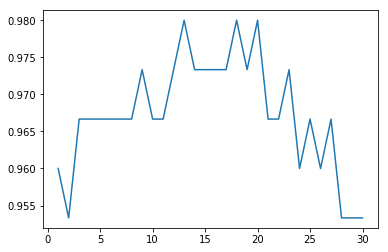

In [40]:
import matplotlib.pyplot as plt
% matplotlib inline

plt.plot(range(1,31),k_scores)

From the above plot we can easily get what is the value of k where we are getting highest accuracy.

# Feature selection using cross validation

- Here goal is to decide whether a feature to be included in LinReg model or not.

Demo example used here is taken from the following GitHub source.

https://github.com/justmarkham/scikit-learn-videos/blob/master/07_cross_validation.ipynb

In [41]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression as linreg

In [42]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col = 0)

In [48]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [51]:
X = data[['TV','Radio','Newspaper']]

In [52]:
y = data['Sales']

In [53]:
lr = linreg()
scores = cross_val_score(lr,X,y,cv = 10,score = 'neg_mean_squared_error')

TypeError: cross_val_score() got an unexpected keyword argument 'score'